# Regression Analysis using Python 

In [3]:
import numpy as np
import pandas as pd 

from scipy import stats
import statsmodels.api as sm 

import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel('/Users/christiancarrillo/Downloads/Housing.xlsx')

In [5]:
data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


### Univariate Regression

In [6]:
data[['House Price', 'House Size (sq.ft.)']]

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


In [12]:
X = data['House Size (sq.ft.)']

X

0     1940
1     1300
2     1420
3     1680
4     1270
5     1850
6     1000
7     1100
8     1600
9     1000
10    2150
11    1900
12    2200
13    1100
14     860
15    1325
16    1350
17    1600
18     950
19    1250
Name: House Size (sq.ft.), dtype: int64

In [13]:
Y = data['House Price']

Y

0     1116000
1      860000
2      818400
3     1000000
4      640000
5     1010000
6      600000
7      700000
8     1100000
9      570000
10     860000
11    1085000
12    1250000
13     850000
14     640000
15     900000
16     730000
17     750000
18     650000
19     680000
Name: House Price, dtype: int64

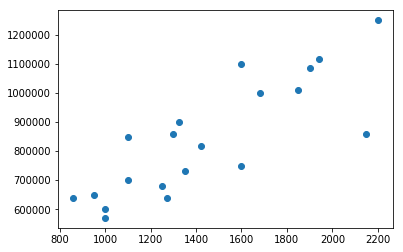

In [16]:
plt.scatter(X,Y) 
plt.show()

Text(0.5,0,'House size (sq.ft.)')

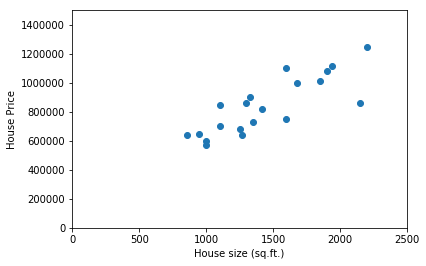

In [22]:
plt.scatter(X,Y)
plt.axis([0,2500,0,1500000])
plt.ylabel('House Price')
plt.xlabel('House size (sq.ft.)') 

This is a graphical reresentation on the raltionship between a house Price and its size


Note: plt.axis will adjust the graph accordingly. The first two numbers correspond to the X axis and the second two to the Y-asxis. we know that there is no house bigger than 2500 sq ft and there is no house more expensive than 1,500,000 
 

In [41]:
X1 = sm.add_constant(X)

reg = sm.OLS(Y,X1).fit()

In [42]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Wed, 19 Jun 2019   Prob (F-statistic):           8.13e-06
Time:                        14:39:56   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Expected value of Y:

In [43]:
260800 + 401.91 * 1000

662710.0

#### Alpha, Beta and R^2

In [46]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [47]:
slope

401.91628631922595

In [49]:
intercept 

260806.2360560964

In [51]:
r_value ** 2

0.678279986579124

In [52]:
p_value

8.129642377231308e-06

In [54]:
std_err

65.24299510636492

Drawing the Best Fitting Line of the regression

In [55]:
def fitline(b):
    return intercept + slope * b 

Apply to the data that was stored in variable X 

In [57]:
line = fitline(X)

Text(0.5,0,'House Size (sq.ft.)')

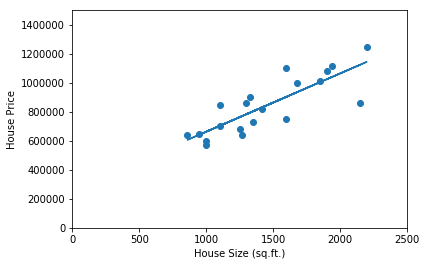

In [62]:
plt.scatter(X,Y)
plt.plot(X, line)
plt.axis([0,2500,0,1500000])
plt.ylabel('House Price')
plt.xlabel('House Size (sq.ft.)')